In [2]:
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [19]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
sns.set_style("whitegrid")
# sns.set_theme()
matplotlib.rcParams['figure.figsize'] = [9.0, 5.0]

In [108]:
tickers = [
    # iShares Core MSCI World USD (Acc)
    "EUNL.DE",
    "SWDA.MI",

    # Xtrackers MSCI Emerging Markets
    "XMME.DE",
    "XMME.MI",

    # iShares MSCI EM
    "EUNM.DE",
    "SEMA.MI",

    # iShares € Govt Bond 1-3yr ETF EUR Acc
    "CBE3.L",
    "CSBGE3.MI",

    # Amundi Euro Government Bond 3-5Y UCITS ETF Acc
    "EM35.MI",

    # Xtrackers Eurozone Government Bond 5-7 UCITS ETF 1C
    "X57E.MI",

    # Amundi Euro Government Bond 7-10Y
    "EM710.MI",

    # Amundi Euro Government Bond 7-10Y
    "EM1015.MI",
    
    # Invesco Physical Gold ETC
    "SGLD.MI",
    # "PPFB.DE", too recent 
    # "8PSG.DE", too many outliers
    ]

In [109]:
df = yf.download(tickers, interval="1d", start="1980-01-01", end="2025-08-01")
df = df["Close"]
# df = yf.download(tickers) # , interval="1d", start="1980-01-01", end="2025-08-01")

/tmp/ipykernel_113476/322556997.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, interval="1d", start="1980-01-01", end="2025-08-01")
[*********************100%***********************]  13 of 13 completed


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4507 entries, 2008-01-02 to 2025-07-31
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CBE3.L     3732 non-null   float64
 1   CSBGE3.MI  3803 non-null   float64
 2   EM1015.MI  4461 non-null   float64
 3   EM35.MI    4462 non-null   float64
 4   EM710.MI   4467 non-null   float64
 5   EUNL.DE    4026 non-null   float64
 6   EUNM.DE    4009 non-null   float64
 7   SEMA.MI    3950 non-null   float64
 8   SGLD.MI    2682 non-null   float64
 9   SWDA.MI    4027 non-null   float64
 10  X57E.MI    4149 non-null   float64
 11  XMME.DE    2062 non-null   float64
 12  XMME.MI    1988 non-null   float64
dtypes: float64(13)
memory usage: 493.0 KB


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

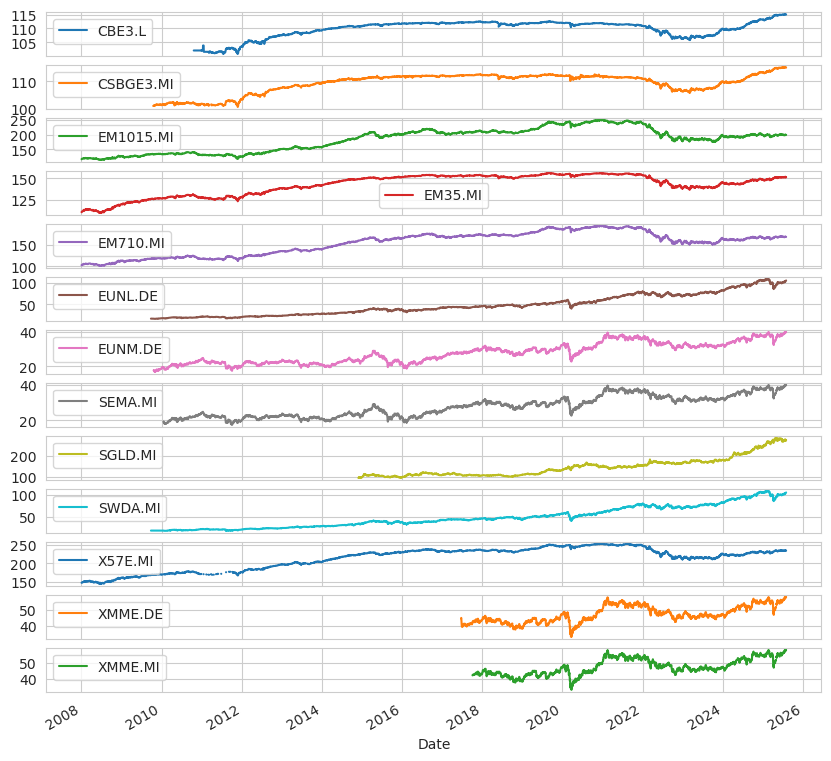

In [111]:
df.plot(figsize=(10, 10), subplots=True)

In [112]:
df_clean = df.ffill(limit=5)

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

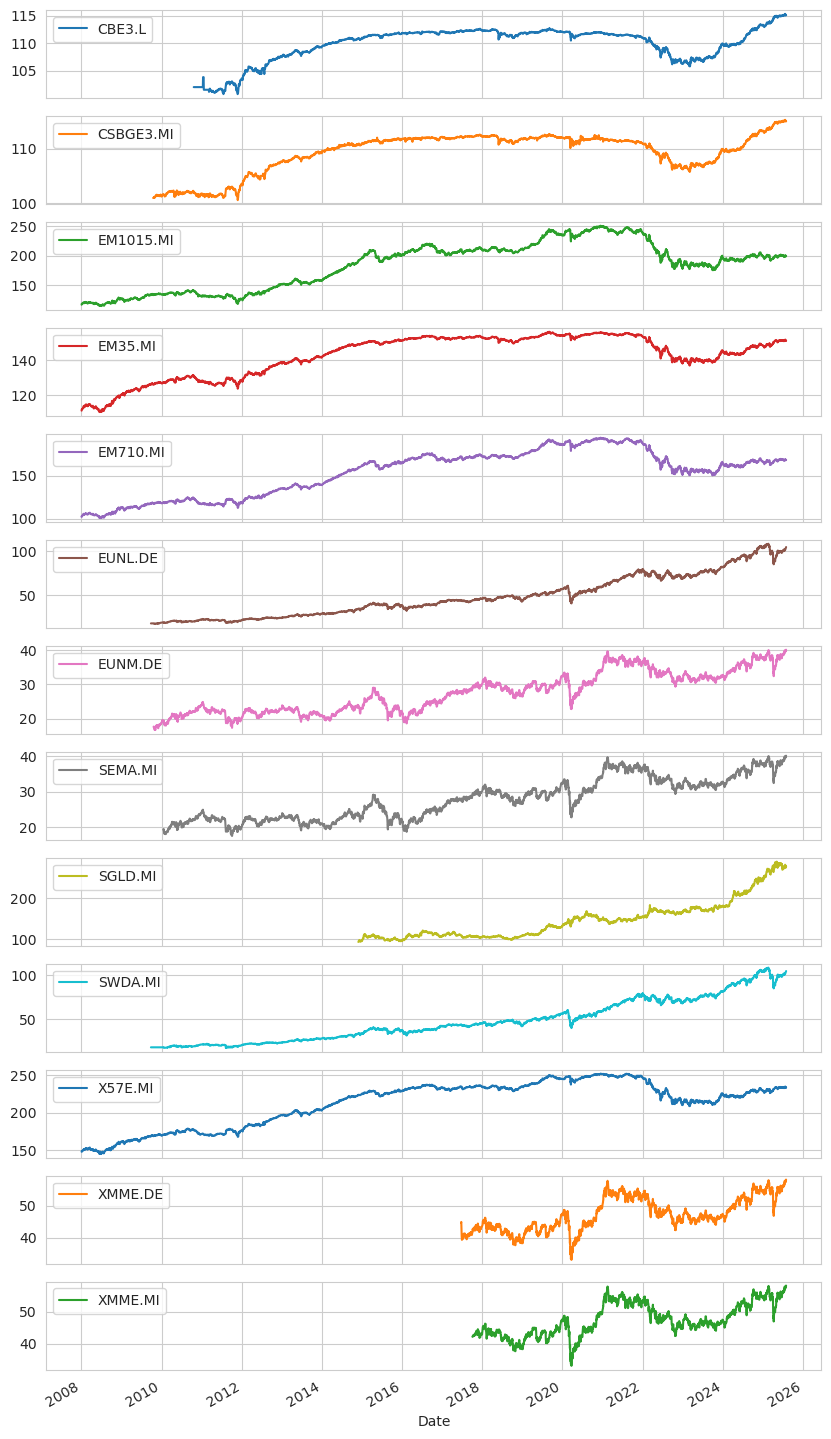

In [134]:
df_clean.plot(figsize=(10, 20), subplots=True)

<Axes: xlabel='Date'>

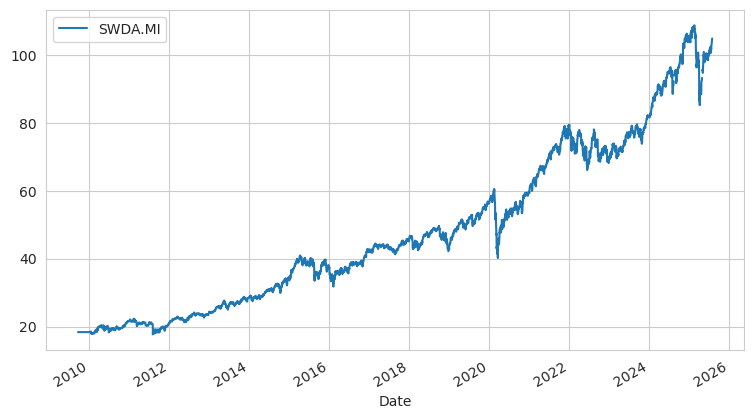

In [135]:
df.plot(y="SWDA.MI")

In [138]:
for c in df.columns:
    print(c)
    d = df[c]
    idx = d.first_valid_index()
    d = d[d.index >= idx]
    d.to_csv(f"../dati/{c}.csv")

CBE3.L
CSBGE3.MI
EM1015.MI
EM35.MI
EM710.MI
EUNL.DE
EUNM.DE
SEMA.MI
SGLD.MI
SWDA.MI
X57E.MI
XMME.DE
XMME.MI


In [114]:
# dfs = []
# for t in tickers:
#     d = yf.download(t, interval="1d", start="1980-01-01", end="2025-08-01")
#     d = d.iloc[:, 3]
#     d.name = t
#     d.to_csv(f"../dati/{t}.csv")
#     dfs.append(d)